In [5]:
%load_ext autoreload
%autoreload 2

!git clone https://github.com/argonne-lcf/ai-science-training-series.git
%cd ai-science-training-series/02_neural_networks_python/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Cloning into 'ai-science-training-series'...
remote: Enumerating objects: 2184, done.
remote: Total 2184 (delta 0), reused 0 (delta 0), pack-reused 2184
Receiving objects: 100% (2184/2184), 211.67 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (1070/1070), done.
Checking out files: 100% (263/263), done.
/content/ai-science-training-series/02_neural_networks_python


In [2]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

In [3]:
# repeating the data prep from the previous notebook
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)
y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000, 784)

MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 784)
y_train: (60000,)


In [6]:
# Here we import an implementation of a two-layer neural network 
# this code is based on pieces of the first assignment from Stanford's CSE231n course, 
# hosted at https://github.com/cs231n/cs231n.github.io with the MIT license
from fc_net import TwoLayerNet

In [7]:
num_features = x_train.shape[1] # this is the number of pixels
# The weights are initialized from a normal distribution with standard deviation weight_scale
model = TwoLayerNet(input_dim=num_features, hidden_dim=300, num_classes=nb_classes, weight_scale=.01)

In [8]:
# here you can take a look if you want at the initial loss from an untrained network
loss, gradients = model.loss(x_train, y_train_onehot)

In [9]:
# a simple implementation of stochastic gradient descent
def sgd(model, gradients, learning_rate):
    for p, w in model.params.items():
        dw = gradients[p]
        new_weights = w - learning_rate * dw
        model.params[p] = new_weights
    return model

In [10]:
# one training step
def learn(model, x_train, y_train_onehot, learning_rate):
    loss, gradients = model.loss(x_train, y_train_onehot)
    model = sgd(model, gradients, learning_rate)
    return loss, model

In [11]:
def accuracy(model, x, true_values):
    scores = model.loss(x)
    predictions = numpy.argmax(scores, axis=1)
    N = predictions.shape[0]
    acc = (true_values == predictions).sum() / N
    return acc

epoch 0, loss 0.05044, accuracy 1.00
epoch 1, loss 0.05044, accuracy 1.00
epoch 2, loss 0.05044, accuracy 1.00
epoch 3, loss 0.05044, accuracy 1.00
epoch 4, loss 0.05044, accuracy 1.00
epoch 5, loss 0.05044, accuracy 1.00
epoch 6, loss 0.05044, accuracy 1.00
epoch 7, loss 0.05044, accuracy 1.00
epoch 8, loss 0.05044, accuracy 1.00
epoch 9, loss 0.05044, accuracy 1.00


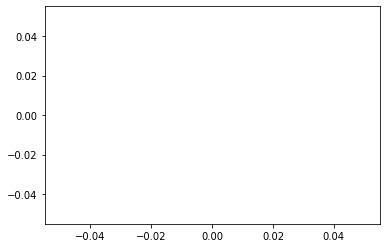

In [16]:
# Here's an example training loop using this two-layer model. Can you do better? 
learning_rate = 0.01 
num_examples = x_train.shape[0]
batch_size = 100000
num_batches = int(num_examples / batch_size)
num_epochs = 10
losses = numpy.zeros(num_batches*num_epochs,)
indices = numpy.arange(num_examples)

i = 0
for epoch in range(0, num_epochs):
    # in each epoch, we loop over all of the training examples
    for step in range(0, num_batches):
        # grabbing the next batch
        offset = step * batch_size
        batch_range = range(offset, offset+batch_size)
        x_train_batch = x_train[batch_range, :]
        y_train_batch = y_train_onehot[batch_range,:]
        
        # feed the next batch in to do one sgd step
        loss, model = learn(model, x_train_batch, y_train_batch, learning_rate)
        losses[i] = loss
        i += 1

    acc = accuracy(model, x_train, y_train)
    print("epoch %d, loss %.5f, accuracy %.2f" % (epoch, loss, acc))
    
    # reshuffle the data so that we get a new set of batches
    numpy.random.shuffle(indices)
    x_train = x_train[indices,:]
    y_train = y_train[indices] # keep this shuffled the same way for use in accuracy calculation
    y_train_onehot = y_train_onehot[indices,:]
plt.plot(losses)

In [15]:
accuracy(model, x_train, y_train)

0.99705

# Homework: improve the accuracy of this model. 

Update this notebook so that the accuracy is improved. How high can you get it? You could change things directly in the notebook, such as increasing the number of epochs, changing the learning weight, changing the width of the hidden layer, etc. If you're more ambitious, you could also try changing the model definition itself by checking out the associated Python files. For example, you could add more layers to the network. The current notebook has a training accuracy of about 43%, but will vary with randomness.

epoch 0, loss 0.00173, accuracy 1.00
epoch 1, loss 0.00687, accuracy 1.00
epoch 2, loss 0.00246, accuracy 1.00
epoch 3, loss 0.00067, accuracy 1.00
epoch 4, loss 0.00149, accuracy 1.00
epoch 5, loss 0.00210, accuracy 1.00
epoch 6, loss 0.00076, accuracy 1.00
epoch 7, loss 0.00139, accuracy 1.00
epoch 8, loss 0.00145, accuracy 1.00
epoch 9, loss 0.00035, accuracy 1.00


1.0

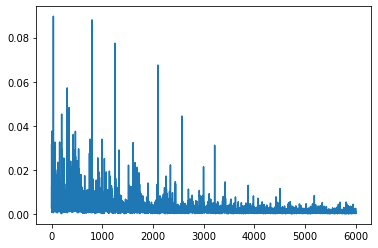

In [17]:
#Through experimenting with the learnign rate, batch size, etc. 
#I was able to increase the accuracy through increasing the learning rate and decreasing the batch size
learning_rate = 0.75  
num_examples = x_train.shape[0]
batch_size = 100
num_batches = int(num_examples / batch_size)
num_epochs = 10
losses = numpy.zeros(num_batches*num_epochs,)
indices = numpy.arange(num_examples)

i = 0
for epoch in range(0, num_epochs):
    # in each epoch, we loop over all of the training examples
    for step in range(0, num_batches):
        # grabbing the next batch
        offset = step * batch_size
        batch_range = range(offset, offset+batch_size)
        x_train_batch = x_train[batch_range, :]
        y_train_batch = y_train_onehot[batch_range,:]
        
        # feed the next batch in to do one sgd step
        loss, model = learn(model, x_train_batch, y_train_batch, learning_rate)
        losses[i] = loss
        i += 1

    acc = accuracy(model, x_train, y_train)
    print("epoch %d, loss %.5f, accuracy %.2f" % (epoch, loss, acc))
    
    # reshuffle the data so that we get a new set of batches
    numpy.random.shuffle(indices)
    x_train = x_train[indices,:]
    y_train = y_train[indices] # keep this shuffled the same way for use in accuracy calculation
    y_train_onehot = y_train_onehot[indices,:]
plt.plot(losses)

ACCT = accuracy(model, x_train, y_train)
print('Training ACC: %d',ACCT)

In [20]:
ACCT = accuracy(model, x_train, y_train)
print('Training ACC: ',ACCT)
ACCTst = accuracy(model, x_test, y_test)
print('Testing ACC: ',ACCTst)

Training ACC:  1.0
Testing ACC:  0.9816
